# CS5228 Assignment 2b - Linear Models & Model Selection (50 Points)

Hello everyone, this assignment notebook covers Linear Models & Model Selection (i.e., hyperparameter tuning). There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A2b_YourName_YourNUSNETID.ipynb** (e.g., **A2b_BobSmith_e12345678.ipynb**) before submission! Failure to do so will yield a penalty of 1 Point.
* Remember to rename and save the script file **A2b_script.py** as **A2b_YourName_YourNUSNETID.py** (e.g., **A2b_BobSmith_e12345678.py**) before submission! Failure to do so will yield a penalty of 1 Point.
* Submission deadline is Oct 9, 11.59 pm (together with A2a). Late submissions will be penalized by 10% for each additional day.

Please also add your nusnet and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = ''
nusnet_id = ''

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts are there to provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well marked, but you can use the overview below to double-check that you covered everything.

* **1 Linear & Logistic Regression (30 Points)**
    * 1.1 Implementing Logistic Regression Classifier (14 Points)
        * 1.1 a) Calculating the Gradient (4 Points)
        * 1.1 b) Implementing Gradient Descent (4 Points)
        * 1.1 c) Predicting Labels (2 Points)
        * 1.1 d) Hyperparameter Tuning "By Hand" and Interpretation of Results (4 Points)
    * 1.2 Questions about Linear and Logistic Regression (16 Points)
        * 1.2 a) True/False Questions about `MyLogisticRegression` (8 Points)
        * 1.2 b) True/False Questions about Linear Regression (8 Points)
* **Model Selection (20 Points)**
    * 2.1 Data Preprocessing (4 Points)
    * 2.2 Performing K-Fold Cross-Validation "By Hand" (10 Points)
        * 2.1 a) Implement k-fold Cross Validation (4 Points)
        * 2.1 b) Run k-fold Cross Validation for 4 Regressors and Discuss the Results. (6 Points)¶
    * 2.3 Hyperparameter Tuning (6 Points)
        * 2.2 a) Perform hyperparameter tuning for AdaBoost (using Decision Trees)! (3 Points)
        * 2.2 b) Discuss your process of finding the best hyperparameter values and the results (3 Points)
        

## Setting up the Notebook

In [2]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Making all the required imports:

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, f1_score
from sklearn import preprocessing

from src.utils import plot_validation_results, plot_scores

np.set_printoptions(precision=3)

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A2b_script.py`, you also need to edit the import statement below accordingly.

In [4]:
from A2b_script import MyLogisticRegression
#from A2b_BobSmith_e12345678 import MyLogisticRegression

-------------------

## 1 Linear & Logistic Regression (30 Points)

**Prepare Dataset (nothing for you to do here).** We use the [Banknote Authentication Dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It contains 1,371 samples, each with 4 numerical features (variance, skewness, kurtosis, and entropy of an image) to predict whether a bank note is genuine or a forgery. We use this dataset mainly for convenience. It basically does not require any data preprocessing as all features are numerical, and there are no "dirty" records. There is also no need for normalization/standardization as all features values are about the same range.

First, let's load the dataset into a pandas dataframe and have a quick look

In [5]:
df_bank = pd.read_csv('data/a2-banknote-authentication.csv')

df_bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


For further processing, we convert the data into numpy arrays; pandas provides convenient methods for that. We also split the data into the input features and the target variable, with the latter being the last column in our data matrix. Lastly, we use `train_test_split` from scitkit-learn to split our dataset into the training and test data. We set the `random_state` to ensure consistent results throughout this task.

In [6]:
# Convert pandas dataframe into numpy array
data = df_bank.to_numpy()

# Separate input features from target variable
X_bank = data[:,:-1]
y_bank = data[:,-1].astype(int)

# Split into training and test set; we use a common 80/20 split here
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=0)

**Visualization (nothing for you to do here).** It never hurts to first have a quick look a the data. Since we have 4 input features, plotting the data points based on all features is not really possible. What we can do however, since we only have 4 features, we can generate the plots for all *pairs* of features. The code cell below does this.

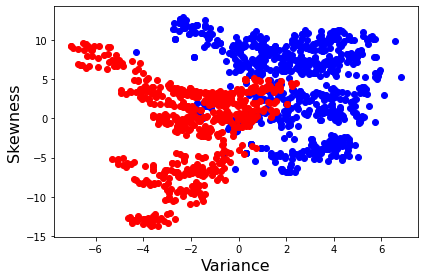

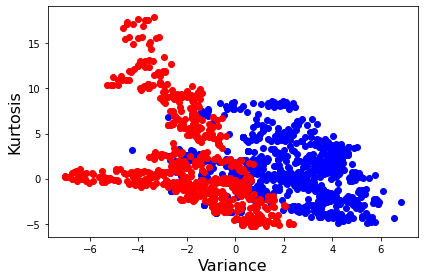

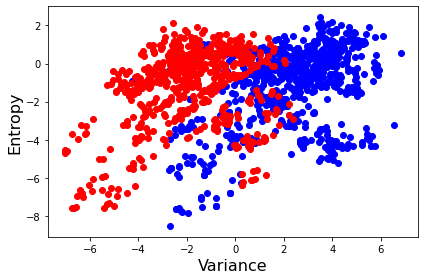

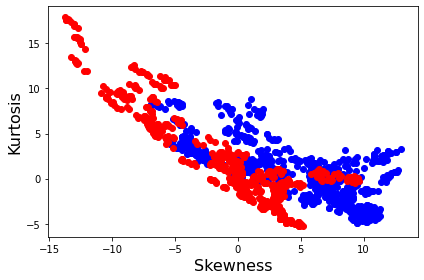

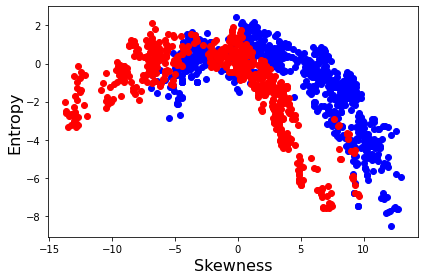

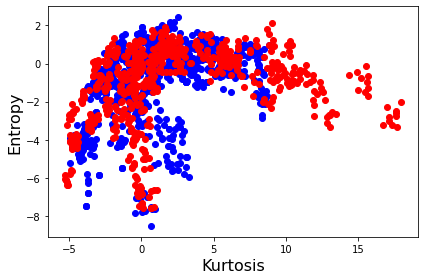

In [7]:
indices_0 = np.where(y_bank==0)
indices_1 = np.where(y_bank==1)

features = ['Variance', 'Skewness', 'Kurtosis', 'Entropy']

for feautre_1 in range(X_bank.shape[1]):
    for feature_2 in range(feautre_1+1, X_bank.shape[1]):
        plt.figure()
        plt.scatter(X_bank[:,feautre_1][indices_0], X_bank[:,feature_2][indices_0], c='blue')
        plt.scatter(X_bank[:,feautre_1][indices_1], X_bank[:,feature_2][indices_1], c='red')
        plt.xlabel(features[feautre_1], fontsize=16)
        plt.ylabel(features[feature_2], fontsize=16)
        plt.tight_layout()
        plt.show()

From the plots we can see that some of the input features seem to be quite helpful in separating the two classes. For example, if we would only use Variance and Skewness (first plot), we could probably get out a decent classifier. In contrast, considering only Kurtosis and Entropy (last plot), we see only a very poor separation of the class labels, so we would not be able to train a good classifier. Summing up, since already some subsets of features seem to be quite useful, we can expect that considering all features will potentially yield very good results.

**Training an off-the-shelf Logistic Regression model (nothing for you to do here).** Before you will implement and test your own Logistic Regression classifier, let's first use [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This will give us a first idea what accuracy result we can aim for.

In [8]:
# Train Logistic Regression model over training data
sk_logreg = LogisticRegression().fit(X_bank_train, y_bank_train)

# Predict labels for test data
y_bank_sk_pred = sk_logreg.predict(X_bank_test)

# Print results (i.e., comparing predicted labels with groundtruth labels of test data)
print('f1 score (test): {:.3f}'.format(f1_score(y_bank_sk_pred, y_bank_test)))

# Show number of iterations (for a later comparison)
print('Number of iterations: {}'.format(sk_logreg.n_iter_[0]))

f1 score (test): 0.992
Number of iterations: 23


The result indeed confirm that we can expect to get very good results with our own implementation.

### 1.1 Implementing Logistic Regression (Binary Classification) (14 Points)

Your task here is to implement a Logistic Regression Classifier for binary classification. One learning outcome is actually to show how quick and easy this is. Below you can find the skeleton code for the class implementing the Logistic Regression Classifier. You will need to complete this code step by step along with the subtasks 2.1 a-c). 

We give you two basic methods for free so you can focus on the core parts:

* `add_bias()` adds the constant feature value $x_0 = 1$ for each data sample to implement the "bias trick"
* `calc_closs()` computes the Cross Entropy loss for the binary case, i.e., directly implementing the formula below

$$ L = -\frac{1}{n} \sum_{i=1}^n \left[ y_i\log{\hat{y}_i} + (1-y_i)\log{(1- \hat{y}_i} )\right]$$

#### 1.1 a) Calculating the Gradient (4 Points)

Given the non-linear nature of the loss function for the Logistic Regression, we cannot find the best $\theta$ values that minimize the loss function analytically. Hence, we have to implement it using Gradient Descent. Here, instead of calculating the $\nabla_\theta L$, setting it to 0, and solving for $\theta$, we start with initial parameter values for $\theta$, calculate the respective gradient, and update $\theta$ to reduce the loss $L$ iteratively.

The gradient for loss $L$ w.r.t. to $\theta$ is given as:

$$\nabla_\theta L = \frac{2}{n} X^T(h_\theta(X) - y)\ \text{, with }\ h_\theta(x_i) = \frac{1}{1+ e^{-\theta^{T}x_i}}$$


**Implement the methods `calc_h()` and `calc_gradient()` to calculate the gradient!** The only reason for doing this using 2 methods is that it allows us to re-use some code later on.

You can use the code cell below to check your implementation.

In [9]:
np.random.seed(1)

my_logreg = MyLogisticRegression()

# Implement bias trick by adding x0 to all data samples
X_bank_train_with_bias = my_logreg.add_bias(X_bank_train)

# Initialize theta with random values
my_logreg.theta = np.random.rand(X_bank_train_with_bias.shape[1])

# Calculate the output of h(x)
h = my_logreg.calc_h(X_bank_train_with_bias)

# Calculate the gradient
grad = my_logreg.calc_gradient(X_bank_train_with_bias, y_bank_train, h)

print('theta values =\n{}\n\nGradient =\n{}\n'.format(my_logreg.theta, grad))

print('theta.shape = {} \t grad.shape = {}'.format(my_logreg.theta.shape, grad.shape))

theta values =
[4.170e-01 7.203e-01 1.144e-04 3.023e-01 1.468e-01]

Gradient =
[0.39  3.495 2.078 0.896 0.4  ]

theta.shape = (5,) 	 grad.shape = (5,)


The code call above should result in the following output:
    
```
theta values =
[[4.170e-01]
 [7.203e-01]
 [1.144e-04]
 [3.023e-01]
 [1.468e-01]]

Gradient =
[[-0.713 -0.713 -0.713 ... -0.713  1.287  1.287]
 [ 0.979  0.979  0.979 ...  0.979  1.818  1.818]
 [-2.424 -2.424 -2.424 ... -2.424  1.334  1.334]
 [-0.07  -0.07  -0.07  ... -0.07   2.702  2.702]
 [ 1.603  1.603  1.603 ...  1.603 -0.745 -0.745]]

theta.shape = (5, 1) 	 grad.shape = (5, 1097)
```

Since we have 4 features an 1 bias, we have 5 theta values, and 5 gradient values for each of the 1,096 training data points.

#### 1.1 b) Implementing Gradient Descent (4 Points)

We now have everything in place to implement the training loop for Gradient Descent.

**Implement the method `fit()` to find the best $\theta$ using Gradient Descent!** Most of the code is given, so you can focus on the loop that performs Gradient Descent -- which is essentially utilizing the methods you have implemented in 1 a). You can test your implementation using the code below. 

In [10]:
np.random.seed(0)

my_logreg = MyLogisticRegression().fit(X_bank_train, y_bank_train, lr=0.001, num_iter=100, verbose=True)

Loss: 1.804054 	 0%
Loss: 1.704696 	 10%
Loss: 1.618719 	 20%
Loss: 1.544692 	 30%
Loss: 1.480550 	 40%
Loss: 1.424379 	 50%
Loss: 1.374730 	 60%
Loss: 1.330562 	 70%
Loss: 1.291095 	 80%
Loss: 1.255663 	 90%
Loss: 1.226715 	 100%


For the default hyperparameter values (`lr=0.01` and `num_iter=100`), the loss should go down to around 1.7.

#### 1.1 c) Predicting Labels (2 Points)

Now that you can train your Logistic Regression classifier, you only need to implement the prediction of class labels for unseen data samples.

**Implement the method predict()** to predict the class label (0 or 1) for an array of unseen data samples. 

In [11]:
np.random.seed(0)

# Default values for 1.1 c)
lr = 0.001
num_iter = 100

# Your values you found for 1.1 d)
#lr = ...
#num_iter = ...


my_logreg = MyLogisticRegression().fit(X_bank_train, y_bank_train, lr=lr, num_iter=num_iter, verbose=True)

y_bank_my_pred = my_logreg.predict(X_bank_test)

y_bank_my_pred_train = my_logreg.predict(X_bank_train)
y_bank_my_pred_test = my_logreg.predict(X_bank_test)

f1_bank_train = f1_score(y_bank_train, y_bank_my_pred_train)
f1_bank_test = f1_score(y_bank_test, y_bank_my_pred_test)

print('f1 score (training): {:.3f}'.format(f1_bank_train))
print('f1 score (test): {:.3f}'.format(f1_bank_test))

Loss: 1.804054 	 0%
Loss: 1.704696 	 10%
Loss: 1.618719 	 20%
Loss: 1.544692 	 30%
Loss: 1.480550 	 40%
Loss: 1.424379 	 50%
Loss: 1.374730 	 60%
Loss: 1.330562 	 70%
Loss: 1.291095 	 80%
Loss: 1.255663 	 90%
Loss: 1.226715 	 100%
f1 score (training): 0.382
f1 score (test): 0.412


For the default hyperparameter values (`lr=0.001` and `num_iter=100`), you should see f1 scores like below:

```
f1 score (training): 0.382
f1 score (test): 0.412
```

#### 1.1 d) Hyperparameter Tuning "By Hand" and Interpretation of Results (3 Points)

Seeing the loss going down (with the example parameter values above) is a good start. However, an f1 score over the test data if around 0.4 is not that great. In fact, we are worse than a random guesser. We also already know from using `sklearn` that an f1 score of over 0.98 is possible. Of course, we could simply increase the value of `num_iter` more and more, knowing that at some point Gradient Descent will eventually reach the minimum. But this would  unnecessarily increase the computation time.

**Try different values for `lr` and `num_iter` and briefly discuss your observations!** You can simply use the code cell above for playing around with both parameters. In more detail:

* Find a setting for both parameters that will increase the f1 score over the test data to at least 0.98; while keeping `num_iter` as small as possible. (Hint: You don't have to make fine-grained changes to the parameters. For example, there's no need in decreasing `num_iter` from 100 to 99 :). Overall, this should be very quick and easy to do. Just try some parameter combination and see how it behaves.

* Discuss any interesting observations you have made while finding such a parameter setting (e.g., how the development of the loss behaves, limitations on the choice of parameter values, etc.) together with a brief explanation. You might also want to compare the results/observations with the `sklearn` run above, as well as with the example we used in the lecture.

**Your Answer**:

### 1.2 Questions about Linear and Logistic Regression (16 Points)

**1.2 a) True/False Questions about `MyLogisticRegression` (8 Points)**: In the table below are 8 statements that are either True or False. Complete the table to specify whether a statement is True or False, and provide a brief explanation for your answer (Your explanation is more important than a simple True/False answer)

**Your Answer:**

This is a markdown cell. Please fill in your answers for (1)~(8).

| No. | Statement                                                                                                   | True or False?       | Brief Explanation |
|-----|------------------------------------------------------------------------------------------------------------|--------------| ------- |
| (1)  | To make `MyLogisticRegression` support Polynomial Logistic Regression, we only need to change the method `calc_h()` and `calc_gradient()` | True | to surpport highier order relationship, need to kernelize the linear predictor before compute the sigmoid    |
| (2)  | If the dataset is linearly separable, `MyLogisticRegression` will eventually achieve a loss of 0 | False| if the input data dimension not sufficient to support the linearly seperation, the loss may not achieve 0  |
| (3)  | Not matter how $\theta$ is initialized, `MyLogisticRegression` will eventually always converge to the same solution (for the same dataset) | False | if dataset not linear speratable, different initialization may lead to deifferent local optima  |
| (4)  | Since `MyLogisticRegression` considers the interaction between features, it always performs better then a (single) Decision Tree | False |  decision tree has no assumption of linearity of the dataset which can handle most of the sernarios  |
| (5)  | Without any extensions, `MyLogisticRegression` is of no use for classification tasks with more than 2 classes | False | the decision making can be descritized into multiple classes   |
| (6)  | If we would extend `MyLogisticRegression` to support *Mini-Batch Gradient Descent*, we should generally use lower learning rates when training a model | True |  batch strategy help to speed up and generalize training procedure |
| (7)  | If you would extend `MyLogisticRegression` to support Regularization, you would see larger training loss | True |  Regularization is a strategy to prevent overfitting issue which with abnormaly high training score  |
| (8)  | If you would have forgotten the constant factor of 2 in `calc_gradient()` your implementation would have converged to a different optimum | False |  the constant 2 just a carried over factor during the dervation, the gradient loss minimizatin direction stay unchanged   |


**1.2 b) True/False Questions about Linear Regression (8 Points)**: In the table below are 8 statements that are either True or False. Complete the table to specify whether a statement is True or False, and provide a brief explanation for your answer (Your explanation is more important than a simple True/False answer)

**Your Answer:**

This is a markdown cell. Please fill in your answers for (1)~(8).


| No. | Statement                                                                                                   | True or False?       | Brief Explanation |
|-----|------------------------------------------------------------------------------------------------------------|--------------| ------- |
| (1)  | Linear Regression is very sensitive to outliers | True |     |
| (2)  | Training a Linear Regression Model requires the data to indeed show a linear relationship | True/False |    |
| (3)  | Assume 2 $d$-dimensional datasets $D_1$ and $D_2$ with $N$ data points. If after training a Linear Regression model over $D_1$ and $D_2$ yields very similar $\theta$ values, then $D_1$ and $D_2$ must also be very similar| False |  the coefcients $theta$ only show the relative relation to the dependent variables, not show the similarity in scale   |
| (4)  | For loss to be 0, all $\theta$ values must be 0 (i.e., $\theta_0 = 0$, $\theta_1 = 0$, ...$\theta_{d+1} = 0$)  so that $h_\theta(x) = 0$ | False |  if all data on the regression line, the loss also can be 0   | 
| (5)  | It's always better to solve a Linear Regression task analytically using the *Normal Equation* and not using Gradient as it yields the best $\theta$ values without the need for convergence | True |      |
| (6)  | Feature scaling (e.g., z-score standardization) speeds up the convergence of Gradient Descent | True |      |
| (7)  | Linear Regression (not Polynomial Linear Regression) is such a simple model that overfitting cannot occur | False |   linear regression are sensitive and easily overfit to the outliers   |
| (8)  | It is possible for a dataset containing samples with a lot of noise to get loss of 0. | False |  if model is absolutely overfit to both data and noise   |

------

## 2 Model Selection (20 Points)

The topic "Classification & Regression" covered a whole series of different models. In this section, we look at the basic data mining task of finding the best model for a given dataset: which model performs best with which hyperparameters. To keep it simple and keep the implementation work to a minimum, we make full use of scikit-learn (see additional hints in the subtasks).

#### Prepare Dataset

#### Load Dataset from File

We use a [WHO Life Expectancy](https://www.kaggle.com/kumarajarshi/life-expectancy-who) dataset for this task. Note that we cleaned the dataset for you (i.e., there are no dirty records in there).

Let's load the file and have a look at it.

In [170]:
df = pd.read_csv('data/a2-life-expectancy-cleaned.csv')

df.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


For your convenience, we split the dataframe into two, one containing the input features, the other containing the class labels.

In [171]:
df_X = df.iloc[:,0:-1]
df_y = df.iloc[:,-1]

## 2.1 Data Preprocessing (4 Points)

As usual, the first step is data preprocessing (informed by an EDA). As mentioned, above there's not much to do as this dataset does not contain any "dirty" records, particularly, there are no NA values in any of the columns/features. As such, there should be no need to remove any samples.

**Perform and data preprocessing/transformation steps you deem appropriate!** As it might affect your decision, the data will be used to train to train 6 different regression model (you can have a quick peak below to see which 6 models are used). Note that some preprocessing steps might be easier to perform on the pandas dataframe while others on the NumPy arrays. This is why we provide 2 code cell, but it's up to which one to use. We also already imported [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html).

**Note:** Perform only preprocessing steps that you indeed deem mandatory and/or meaningful, and briefly(!) explain you decision by commenting your code.

In [177]:
#########################################################################################
### Your code starts here ###############################################################

display(df_X.info())

### Your code ends here #################################################################
#########################################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Status                           1649 non-null   object 
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8   BMI                              1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria          

None

In [167]:
# Convert dataframes to numpy arrays
X, y = df_X.to_numpy(), df_y.to_numpy()

# Split dataset in training and test data (20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [168]:
#########################################################################################
### Your code starts here ###############################################################



### Your code ends here #################################################################
#########################################################################################

#### Training and Evaluating off-the-shell Models

Packages like `scikit-learn` make it almost trivial to train a variety of models with a minimum number of lines of codes. In the following code cell, we train 6 different models with their default values using the training data, and evaluate them over the test set. We use the F1 score as the evaluation metric.

In [169]:
print('RSME scores for test data for all regressors')
print('============================================')
for model in [KNeighborsRegressor(), LinearRegression(), DecisionTreeRegressor(),
              AdaBoostRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]:    
    try:
        regressor = model.fit(X_train, y_train)
        # Predict values for test samples
        y_pred = model.predict(X_test)
        # Calculate the RSME
        rsme = mean_squared_error(y_test, y_pred, squared=False)
    except Exception as e:
        print(e)
        # Handle exception (e.g., a regressor is still None)
        rsme = '---'
    # Print regressor name and the RSME score
    print('{}:\t{:.3}'.format(type(regressor).__name__, rsme))

RSME scores for test data for all regressors
could not convert string to float: 'Developing'


NameError: name 'regressor' is not defined

### 2.2 Performing K-Fold Cross-Validation "By Hand" (8 Points)

The code below shows the basic loop for an evaluation using k-fold cross-validation. The only bits missing are the steps to (a) create the k folds and (b) to construct the training set of (k-1) folds and the validation set of 1 fold. For this task, use the `DecisionTreeRegressor` by default as it is the fastest to evaluate. 

#### 2.2 a) Implement k-fold Cross Validation (4 Points)
For testing and debugging, feel free to reduce `num_folds` (e.g., 5) and `param_choices` (e.g., `[1, 2, 3]`) in the beginning. (Hint: Have a look at [`np.array_split`](https://numpy.org/doc/stable/reference/generated/numpy.array_split.html))

In [ ]:
%%time

num_folds = 5 # For testing debugging
#num_folds = 10

param_choices = [1, 2, 3, 5] # For testing debugging
#param_choices = [1, 2, 3, 5, 8, 10, 12, 15, 20, 25, 50]



X_train_folds = []
y_train_folds = []

#########################################################################################
### Your code starts here ###############################################################



### Your code ends here #################################################################
#########################################################################################


param_to_scores = {}

for param in param_choices:
    
    ## We want to keep track of the training scores and validation scores
    rsme_train, rsme_valid = [], []
    
    for i in range(num_folds):
        X_train_fold, X_valid_fold = None, None
        y_train_fold, y_valid_fold = None, None

        #########################################################################################
        ### Your code starts here ###############################################################
        

        
        ### Your code ends here #################################################################
        #########################################################################################           

        
        ## Train all the classifiers one-by-one and discuss the results
        #regressor = KNeighborsRegressor(n_neighbors=param).fit(X_train_fold, y_train_fold)
        regressor = DecisionTreeRegressor(max_depth=param).fit(X_train_fold, y_train_fold)
        #regressor = RandomForestRegressor(max_depth=param).fit(X_train_fold, y_train_fold)
        #regressor = GradientBoostingRegressor(max_depth=param).fit(X_train_fold, y_train_fold)

        
        ## Predict labels for for training validation set
        y_pred_fold_train = regressor.predict(X_train_fold)
        y_pred_fold_valid = regressor.predict(X_valid_fold)
      
        ## Keep track of training and validation scores
        rsme_train.append(mean_squared_error(y_train_fold, y_pred_fold_train, squared=False))
        rsme_valid.append(mean_squared_error(y_valid_fold, y_pred_fold_valid, squared=False))
        
    ## Keep track of all num_folds f1 scores for current param (for plotting)
    param_to_scores[param] = (rsme_train, rsme_valid)
    
    ## Print statement for some immediate feedback
    print('param = {}, RSME (training) = {:.3f}, RSME (validation) = {:.3f} (stdev: {:.3f})'.format(param, np.mean(rsme_train), np.mean(rsme_valid), np.std(rsme_valid)))
    

#### Visualization of Results

We provide you with 2 methods to visualize the results. `plot_validation_results()` shows all `num_folds` scores for each parameter setting together with the means and standard deviations of the validation scores.

In [ ]:
plot_validation_results(param_to_scores)

The method `plot_scores()` shows the training and validation scores for each parameter setting.

In [ ]:
plot_scores(param_to_scores)

The code above for the k-fold cross-validation already contains the lines for the training of 4 different regressors:

* [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) with `n_neighbors` as hyperparameter

* [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with `max_depth` as hyperparameter

* [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) with `max_depth` as hyperparameter

* [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) with `max_depth` as hyperparameter

We focus on these 4 models since we look at only one hyperparameter and consider only integer values. This `n_neighbors` (for KNN) and `max_depth` for the tree-based models are important hyperparameters assume integer values.


#### 2.2 b) Run k-fold Cross Validation for 4 Regressors and Discuss the Results. (6 Points)¶

You should see quite a number of differences regarding runtimes, issues of overfitting and underfitting, overall performance, etc. Hint: Use the methods `plot_scores()` and `plot_validation_results` to visualize the results; save the 2 plots for each regressor as images so you can easily compare them side by side (there's no need to submit the images later!)

**Your answer:**

### 2.3 Hyperparameter Tuning (6 Points)

The results of the different models in off-the-shelf implementations vary quite a bit, but of course, we used the only default parameters of each implementation which might or might not be good for our dataset and task. In practice, you would perform hyperparameter tuning for all or at least most models. However, this is unnecessarily since the tuning process is very similar for each model. So we do it only for one model: **AdaBoost** (which shows a comparatively poor performance with the default values)

#### 2.3 a) Perform hyperparameter tuning for AdaBoost (using Decision Trees)! (3 Points)

**Important hints:**

* Use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)! It automatically performs k-fold cross-validation (by default: k=5, which is fine) for all specified combinations of hyperparameter values. With [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), finding the best model (i.e., the model with the best hyperparameter models) should only require only very few lines of code!
* As we have 10 classes we rely on averaged f1 scores. Please use `scoring='f1_macro'` for [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)!
* [`AdaBoostRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) with (`base_estimator=DecisionTreeRegressor()`) provides a whole range of hyperparameters. Pick a **3-4 meaningful hyperparameters** to tune the model!

In [ ]:
%%time

model = None

base_estimator = DecisionTreeRegressor()

#########################################################################################
### Your code starts here ###############################################################



### Your code ends here #################################################################
######################################################################################### 

# Store the parameters of the best model
best_params = model.best_params_

# Predict class labels of test data on the model with the best found parameters
y_pred = model.predict(X_test)

# Calculate the f1 score
best_f1 = mean_squared_error(y_test, y_pred, squared=False)

print('Best AdaBoost (with Decision Tree) regressor: {} (RSME: {:.3f})'.format(best_params, best_f1))

#### 2.3 b) Discuss your process of finding the best hyperparameter values and the results (3 Points). 

Interesting points may include the choice of values for the grid search (and required changes), the improvements compared to the results for the default parameters in 3.1 a), the overall time required to find the best hyperparameter values, or any other interesting or surprising observations you have made during this task.

**Your answer:**